In [1]:
import csv

from collections import Counter, defaultdict
from matplotlib import pyplot as plt

In [2]:
events = set()

last_individual_time = defaultdict(float)
duplicate_individuals = defaultdict(bool)
last_unique_time = defaultdict(float)

with open('../../duplicate_events.csv') as file:
    reader = iter(csv.reader(file))
    next(reader)
    
    last_event = None
    individuals = []
    
    for row in reader:
        reference = int(row[0])
        event_time = float(row[1])
        x = int(row[2])
        y = int(row[3])
        index = int(row[4])
        type_ = row[5]
        
        event = (event_time, (x, y, index), type_)
        
        last_individual_time[reference] = event_time
        
        if event != last_event:
            if last_event is not None:
                events.add(last_event)
                    
                for individual in individuals:
                    if not duplicate_individuals[individual]:
                        duplicate_individuals[individual] = True
                        
                        last_unique_time[individual] = last_event[0]
                
                if len(individuals) == 1 or last_event[2] == 's':
                    duplicate_individuals[individuals[0]] = False
                    
                    last_unique_time[individuals[0]] = last_event[0]
            
            last_event = event
            individuals = []
        
        individuals.append(reference)
    
    if last_event is not None:
        events.add(last_event)
        
        for individual in individuals:
            if not duplicate_individuals[individual]:
                duplicate_individuals[individual] = True

                last_unique_time[individual] = last_event[0]

    if len(individuals) == 1 or last_event[2] == 's':
        last_unique_time[individuals[0]] = last_event[0]

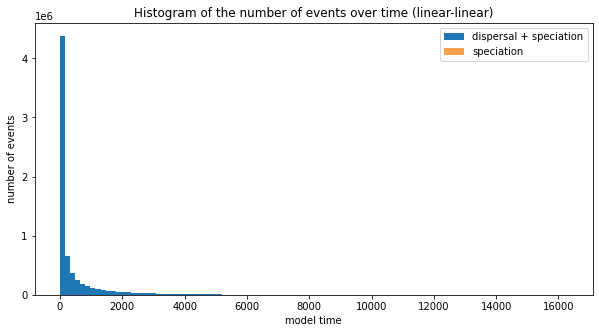

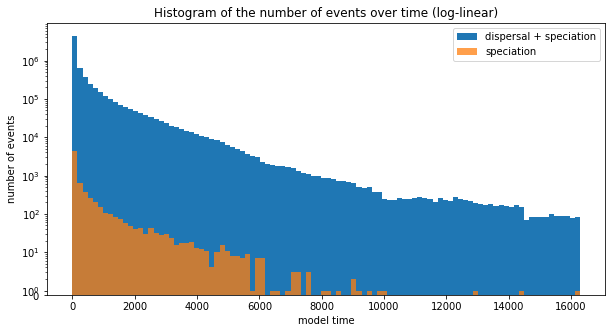

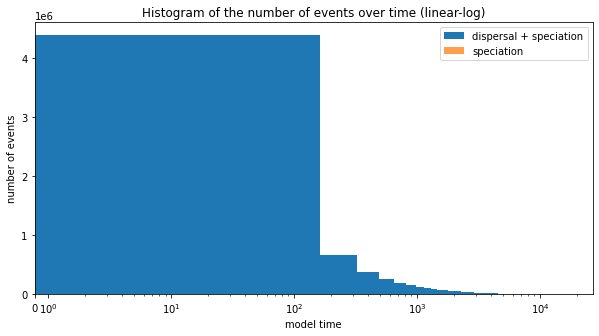

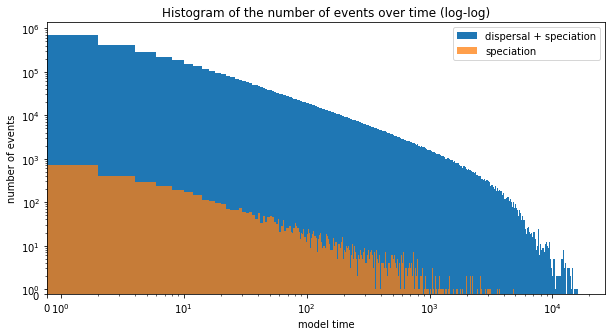

In [3]:
times = [event[0] for event in events]
speciation_times = [event[0] for event in events if event[2] == 's']

plt.figure(figsize=(10, 5))

bins = int(max(times) - min(times)) // 2

plt.hist(times, bins=min(bins, 100), label='dispersal + speciation')
plt.hist(speciation_times, bins=min(bins, 100), alpha=0.75, label='speciation')

plt.xscale('linear')
plt.yscale('linear')

plt.title('Histogram of the number of events over time (linear-linear)')
plt.xlabel('model time')
plt.ylabel('number of events')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.hist(times, bins=min(bins, 100), label='dispersal + speciation')
plt.hist(speciation_times, bins=min(bins, 100), alpha=0.75, label='speciation')

plt.xscale('linear')
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(bottom=0)

plt.title('Histogram of the number of events over time (log-linear)')
plt.xlabel('model time')
plt.ylabel('number of events')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.hist(times, bins=min(bins, 100), label='dispersal + speciation')
plt.hist(speciation_times, bins=min(bins, 100), alpha=0.75, label='speciation')

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('linear')
plt.xlim(left=0)

plt.title('Histogram of the number of events over time (linear-log)')
plt.xlabel('model time')
plt.ylabel('number of events')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.hist(times, bins=bins, label='dispersal + speciation')
plt.hist(speciation_times, bins=bins, alpha=0.75, label='speciation')

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.title('Histogram of the number of events over time (log-log)')
plt.xlabel('model time')
plt.ylabel('number of events')

plt.legend()
plt.show()

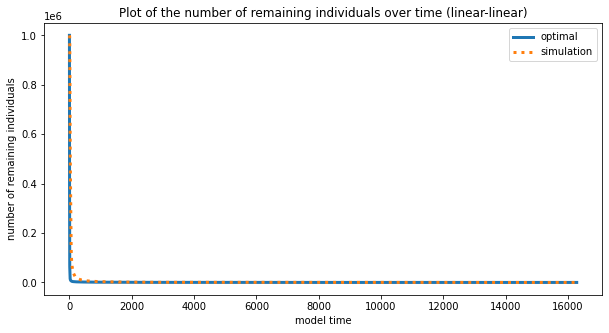

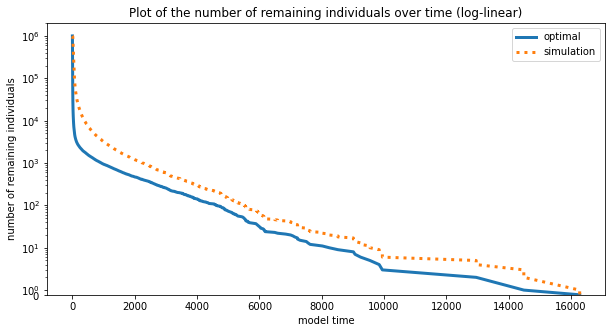

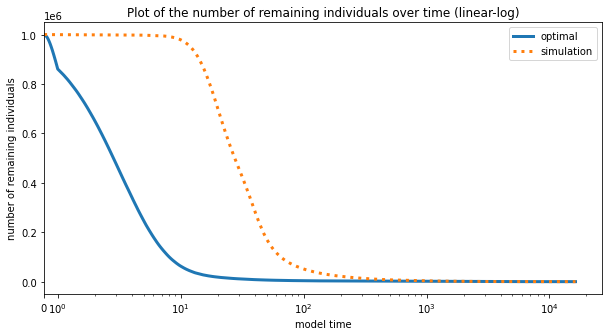

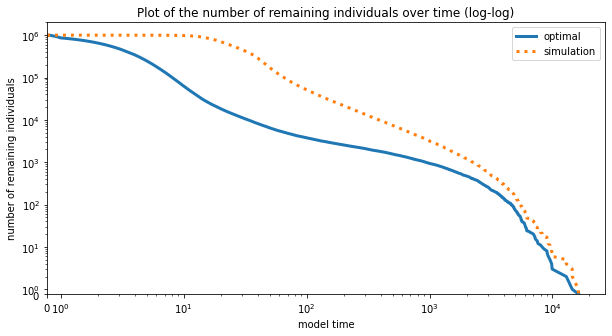

In [4]:
total_individuals = len(last_individual_time)

final_times = sorted(last_individual_time.values())
earliest_times = sorted(last_unique_time[ref] for ref in last_individual_time.keys())

plt.figure(figsize=(10, 5))

plt.plot([0] + earliest_times, range(total_individuals, -1, -1), label='optimal', linewidth=3)
plt.plot([0] + final_times, range(total_individuals, -1, -1), label='simulation', linestyle=':', linewidth=3)

plt.xscale('linear')
plt.yscale('linear')

plt.title('Plot of the number of remaining individuals over time (linear-linear)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + earliest_times, range(total_individuals, -1, -1), label='optimal', linewidth=3)
plt.plot([0] + final_times, range(total_individuals, -1, -1), label='simulation', linestyle=':', linewidth=3)

plt.xscale('linear')
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(bottom=0)

plt.title('Plot of the number of remaining individuals over time (log-linear)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + earliest_times, range(total_individuals, -1, -1), label='optimal', linewidth=3)
plt.plot([0] + final_times, range(total_individuals, -1, -1), label='simulation', linestyle=':', linewidth=3)

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('linear')
plt.xlim(left=0)

plt.title('Plot of the number of remaining individuals over time (linear-log)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + earliest_times, range(total_individuals, -1, -1), label='optimal', linewidth=3)
plt.plot([0] + final_times, range(total_individuals, -1, -1), label='simulation', linestyle=':', linewidth=3)

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.title('Plot of the number of remaining individuals over time (log-log)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals')

plt.legend()
plt.show()

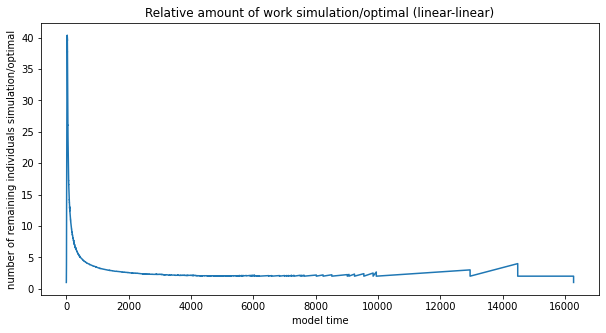

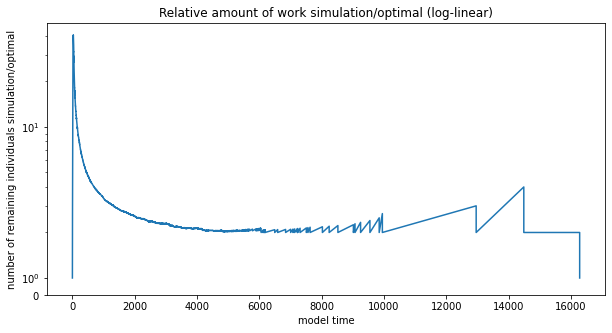

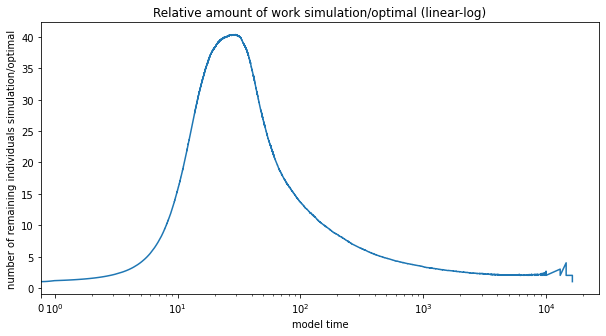

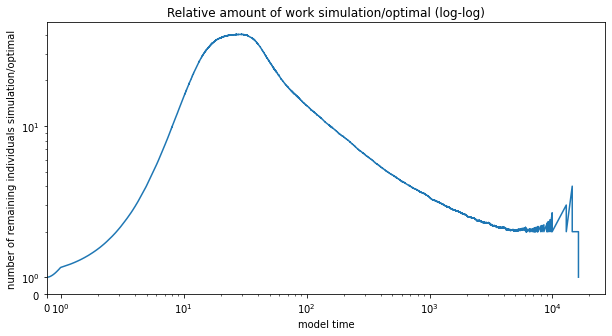

In [5]:
optimal_individuals = total_individuals
simulated_individuals = total_individuals

combined_times = []
relative_work = []

final_times = sorted((last_individual_time.values()), reverse=True)
earliest_times = sorted((last_unique_time[ref] for ref in last_individual_time.keys()), reverse=True)

while len(final_times) > 0 and len(earliest_times) > 0:
    if final_times[-1] < earliest_times[-1]:
        time = final_times.pop()
        simulated_individuals -= 1
    else:
        time = earliest_times.pop()
        optimal_individuals -= 1
    
    combined_times.append(time)
    relative_work.append(max(simulated_individuals, 1) / max(optimal_individuals, 1))

while len(final_times) > 0:
    time = final_times.pop()
    simulated_individuals -= 1
    
    combined_times.append(time)
    relative_work.append(max(simulated_individuals, 1) / max(optimal_individuals, 1))

while len(earliest_times) > 0:
    time = earliest_times.pop()
    optimal_individuals -= 1
    
    combined_times.append(time)
    relative_work.append(max(simulated_individuals, 1) / max(optimal_individuals, 1))

plt.figure(figsize=(10, 5))

plt.plot([0] + combined_times, [1.0] + relative_work)

plt.xscale('linear')
plt.yscale('linear')

plt.title('Relative amount of work simulation/optimal (linear-linear)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals simulation/optimal')

plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + combined_times, [1.0] + relative_work)

plt.xscale('linear')
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(bottom=0)

plt.title('Relative amount of work simulation/optimal (log-linear)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals simulation/optimal')

plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + combined_times, [1.0] + relative_work)

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('linear')
plt.xlim(left=0)

plt.title('Relative amount of work simulation/optimal (linear-log)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals simulation/optimal')

plt.show()

plt.figure(figsize=(10, 5))

plt.plot([0] + combined_times, [1.0] + relative_work)

plt.xscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.title('Relative amount of work simulation/optimal (log-log)')
plt.xlabel('model time')
plt.ylabel('number of remaining individuals simulation/optimal')

plt.show()